In [1]:
import mne

In [2]:
filepath = r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\cnt.mat"

In [6]:
#Save the raw data in the dictionary
import numpy as np
from scipy.io import loadmat
import pandas as pd

nirs_matlab_files = loadmat(filepath)
    
nirs_channels = [item.flat[0] for item in nirs_matlab_files['cnt'][0][0]['clab'][0][0][0]]    

In [7]:
nirs_lowWL = nirs_channels[:36]
print(nirs_lowWL)
nirs_highWL = nirs_channels[36:]
print(nirs_highWL)

['AF7Fp1lowWL', 'AF3Fp1lowWL', 'AF3AFzlowWL', 'FpzFp1lowWL', 'FpzAFzlowWL', 'FpzFp2lowWL', 'AF4AFzlowWL', 'AF4Fp2lowWL', 'AF8Fp2lowWL', 'OzPOzlowWL', 'OzO1lowWL', 'OzO2lowWL', 'C5CP5lowWL', 'C5FC5lowWL', 'C5C3lowWL', 'FC3FC5lowWL', 'FC3C3lowWL', 'FC3FC1lowWL', 'CP3CP5lowWL', 'CP3C3lowWL', 'CP3CP1lowWL', 'C1C3lowWL', 'C1FC1lowWL', 'C1CP1lowWL', 'C2FC2lowWL', 'C2CP2lowWL', 'C2C4lowWL', 'FC4FC2lowWL', 'FC4C4lowWL', 'FC4FC6lowWL', 'CP4CP6lowWL', 'CP4CP2lowWL', 'CP4C4lowWL', 'C6CP6lowWL', 'C6C4lowWL', 'C6FC6lowWL']
['AF7Fp1highWL', 'AF3Fp1highWL', 'AF3AFzhighWL', 'FpzFp1highWL', 'FpzAFzhighWL', 'FpzFp2highWL', 'AF4AFzhighWL', 'AF4Fp2highWL', 'AF8Fp2highWL', 'OzPOzhighWL', 'OzO1highWL', 'OzO2highWL', 'C5CP5highWL', 'C5FC5highWL', 'C5C3highWL', 'FC3FC5highWL', 'FC3C3highWL', 'FC3FC1highWL', 'CP3CP5highWL', 'CP3C3highWL', 'CP3CP1highWL', 'C1C3highWL', 'C1FC1highWL', 'C1CP1highWL', 'C2FC2highWL', 'C2CP2highWL', 'C2C4highWL', 'FC4FC2highWL', 'FC4C4highWL', 'FC4FC6highWL', 'CP4CP6highWL', 'CP4CP2

In [8]:
# Montage data

mnt = loadmat(r"C:\Users\bio86\Downloads\NIRS_01-29\subject 01\mnt.mat")

pos_3d = mnt['mnt']['pos_3d'][0][0].T

clab_lowWL = {}
clab_highWL = {}

for i in range(36):
    clab_lowWL[mnt['mnt']['clab'][0][0][0][i][0]+"lowWL"]=pos_3d[i]
    clab_highWL[mnt['mnt']['clab'][0][0][0][i][0]+"highWL"]=pos_3d[i]

#print(clab_lowWL.keys())

mnt_lowWL = mne.channels.make_dig_montage(clab_lowWL,hsp=pos_3d,coord_frame='head')
mnt_highWL = mne.channels.make_dig_montage(clab_highWL,hsp=pos_3d,coord_frame='head')

In [11]:
# Initialize an info structure

#Info Structure for Low Work Load Raw Data
info_lowWL = mne.create_info(
    ch_names=nirs_lowWL,
    ch_types=['fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw'],
    sfreq=12.5)

#Info Structure for High Work Load Raw Data 
info_highWL = mne.create_info(
    ch_names=nirs_highWL,
    ch_types=['fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw'],
    sfreq=12.5)
    
#Set montage structure for both low workload and high workload    
info_lowWL.set_montage(mnt_lowWL)
info_highWL.set_montage(mnt_highWL)

<Info | 8 non-empty values
 bads: []
 ch_names: AF7Fp1highWL, AF3Fp1highWL, AF3AFzhighWL, FpzFp1highWL, ...
 chs: 36 FNIRS_RAW
 custom_ref_applied: False
 dig: 36 items (36 Extra)
 highpass: 0.0 Hz
 lowpass: 6.2 Hz
 meas_date: unspecified
 nchan: 36
 projs: []
 sfreq: 12.5 Hz
>

Creating RawArray with float64 data, n_channels=36, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<ipython-input-12-7501a6c4f2ed>:1: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  mnt_lowWL.plot()


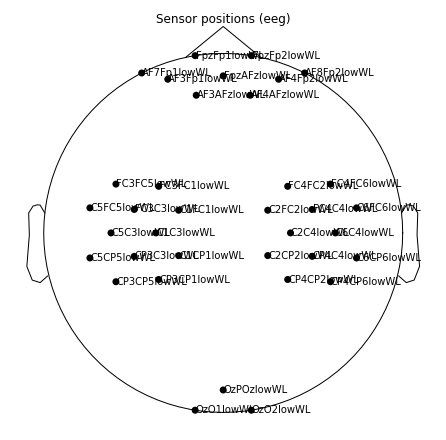

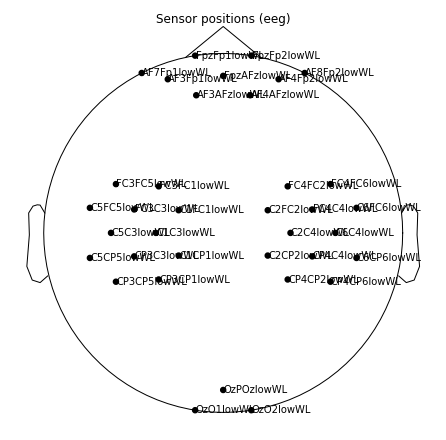

In [12]:
mnt_lowWL.plot()

In [ ]:
nirs_raw_data1 = pd.DataFrame([[row.flat[0] for row in line] for line
                               in nirs_matlab_files["subject{0}".format(i+1)]['cnt'][0][0]['x'][0][0]],
                                                     columns=nirs_channels)
nirs_raw_data2 = pd.DataFrame([[row.flat[0] for row in line] for line
                               in nirs_matlab_files["subject{0}".format(i+1)]['cnt'][0][2]['x'][0][0]],
                                                     columns=nirs_channels)
nirs_raw_data3 = pd.DataFrame([[row.flat[0] for row in line] for line
                               in nirs_matlab_files["subject{0}".format(i+1)]['cnt'][0][4]['x'][0][0]],
                                                     columns=nirs_channels)))
#print(nirs_raw_data["subject{0}".format(i+1)].T.iloc[0:36])
nirs_raw1_lowWL = mne.io.RawArray(nirs_raw_data1.T.iloc[0:36], info_lowWL)
nirs_raw2_lowWL = mne.io.RawArray(nirs_raw_data2.T.iloc[0:36], info_lowWL)
nirs_raw3_lowWL = mne.io.RawArray(nirs_raw_data3.T.iloc[0:36], info_lowWL)
nirs_raw1_highWL = mne.io.RawArray(nirs_raw_data1.T.iloc[36:], info_highWL)
nirs_raw2_highWL = mne.io.RawArray(nirs_raw_data2.T.iloc[36:], info_highWL)
nirs_raw3_highWL = mne.io.RawArray(nirs_raw_data3.T.iloc[36:], info_highWL)
      
print(nirs_raw_lowWL.keys())                                                                                                       
print(nirs_raw_highWL.keys())